# Visualize Headphone Recordings

In [1]:
import numpy as np
import sounddevice as sd
import soundfile as sf
from numpy import ndarray
from shared.record_signal import convert_audio_to_numpy_array
import matplotlib.pyplot as plt

### Global Parameters

In [2]:
# globale parameters
headphones = ['HD600', 'HED415N_1', 'HED415N_3', 'HED415N_4', 'K271', 'K601_001918', 'K601_001935', 'K601_14539', 'K612_PRO_000744']
fs = 44100
count = 10

### Visualize Impulse Response

In [3]:
def visualize_impulse_response(headphone: str, y_l: ndarray, y_r:ndarray):
    t_vec = np.arange(0, np.size(y_l)) / fs
    # fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8), sharex='row', sharey='row')
    fig, ((ax3, ax4)) = plt.subplots(1, 2, figsize=(19, 6), sharex='row', sharey='row')
    # ax1.plot(t_vec, 20*np.log10(np.abs(HD_600_avg_y_r)))
    # ax1.set_title("IR Left Logarithmic")
    # ax1.set_ylim([-120, 12])
    # ax1.set_ylabel("Magnitude [dB]")
# 
    # ax2.plot(t_vec, 20*np.log10(np.abs(HD_600_avg_y_r)))
    # ax2.set_title("IR Right Logarithmic")
    # ax2.set_ylim([-120, 12])

    ax3.plot(t_vec, y_l)
    ax3.set_title("IR Left (zoomed in)")
    ax3.set_xlabel('Seconds')
    ax3.set_ylabel("Amplitude")

    ax4.plot(t_vec, y_r)
    ax4.set_title("IR Right (zoomed in)")
    ax4.set_xlabel('Seconds')
    ax4.set_ylabel("Amplitude")

    ax3.set_xlim([0.0, 0.003])

    fig.suptitle(f'Impulse Response (IR) of {headphone}', fontsize=16)

In [4]:
def get_average_of_impulse_response(headphone: str, count: int):
    y_l_sum = np.empty([17640])
    y_r_sum = np.empty([17640])

    for i in range(count):
        audio, fs = convert_audio_to_numpy_array(f"../HPIRs_Erbes_44100Hz/Measurements/{headphone}/pass0{i}.wav")

        y_l_sum = y_l_sum + audio[:, 0]
        y_r_sum = y_l_sum + audio[:, 1]

    y_l_avg = y_l_sum / count
    y_r_avg = y_r_sum / count

    visualize_impulse_response(headphone, y_l_avg, y_r_avg)

    # return y_l_avg, y_r_avg

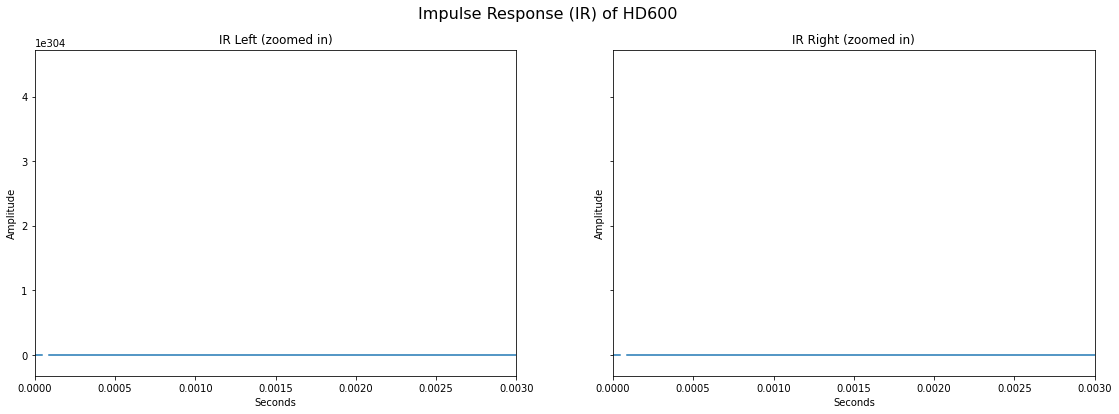

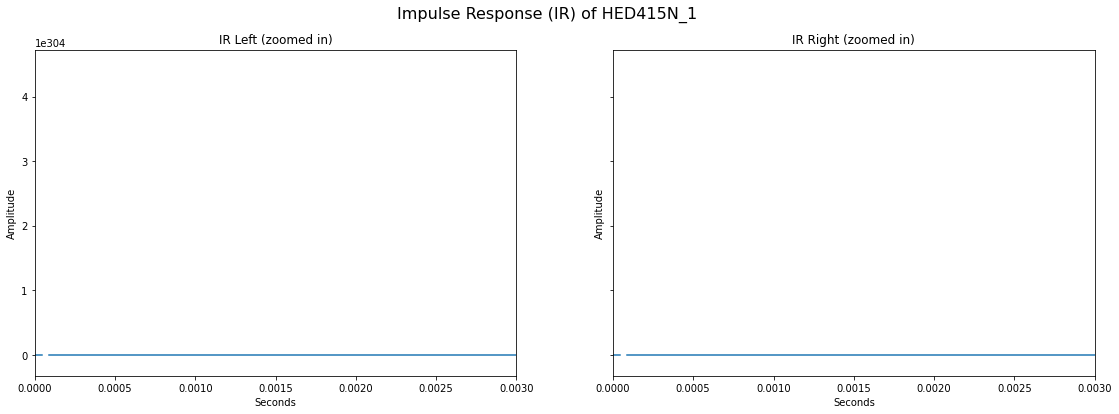

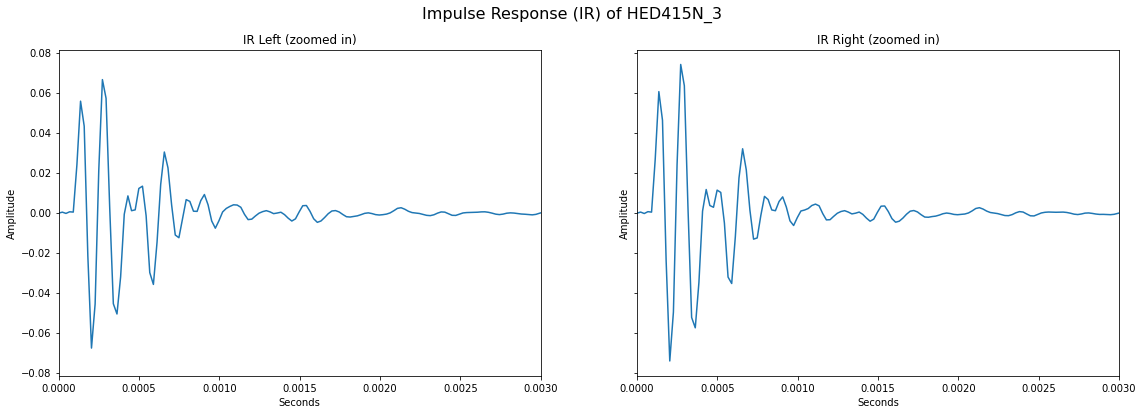

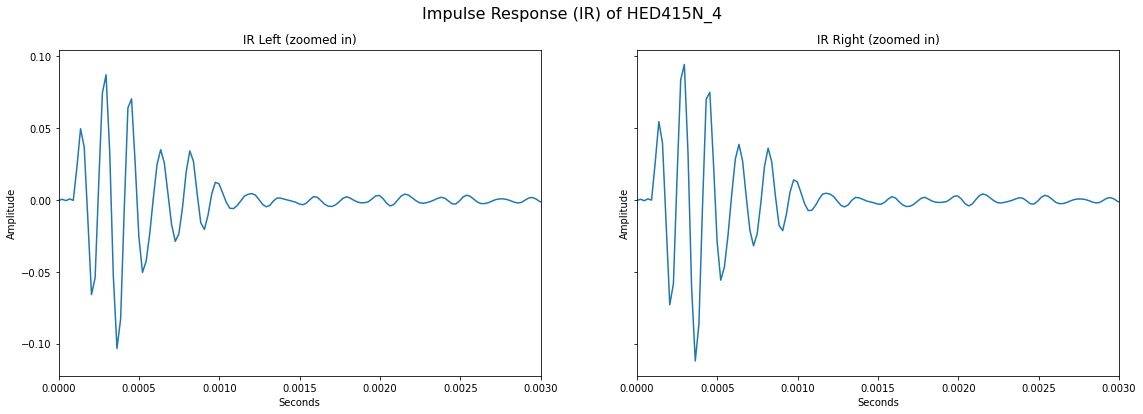

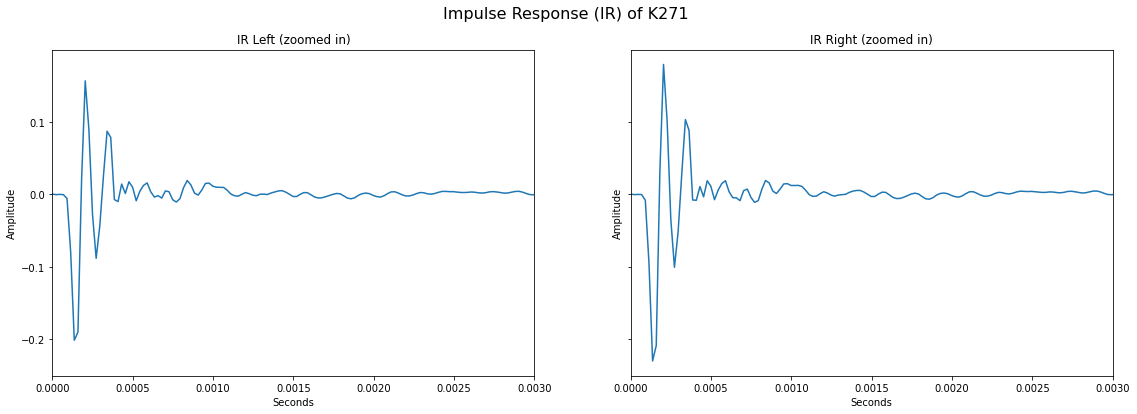

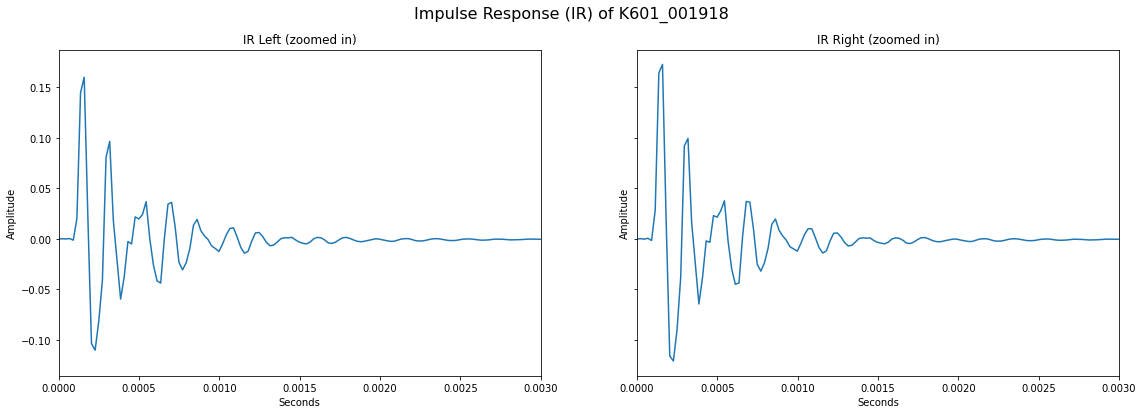

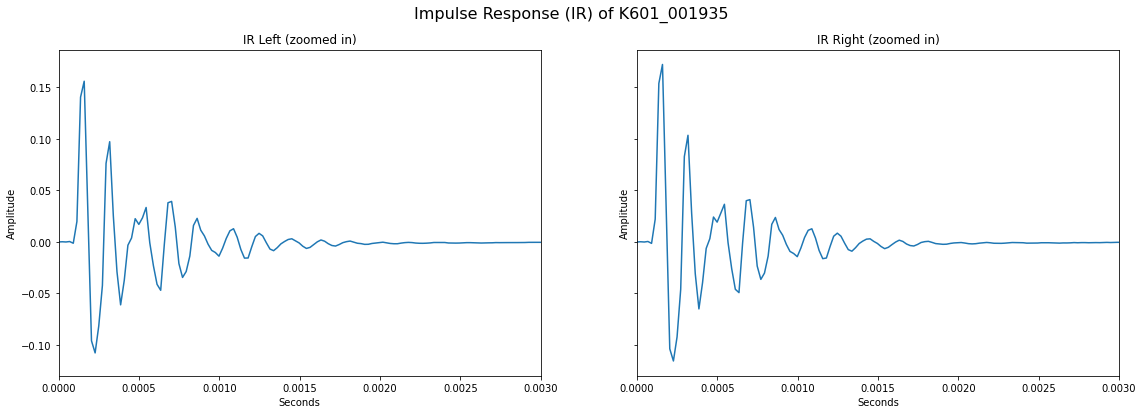

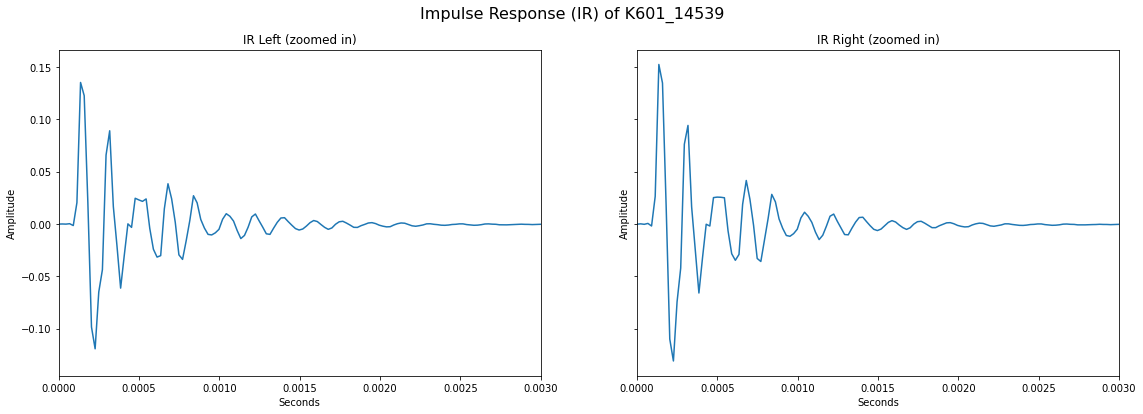

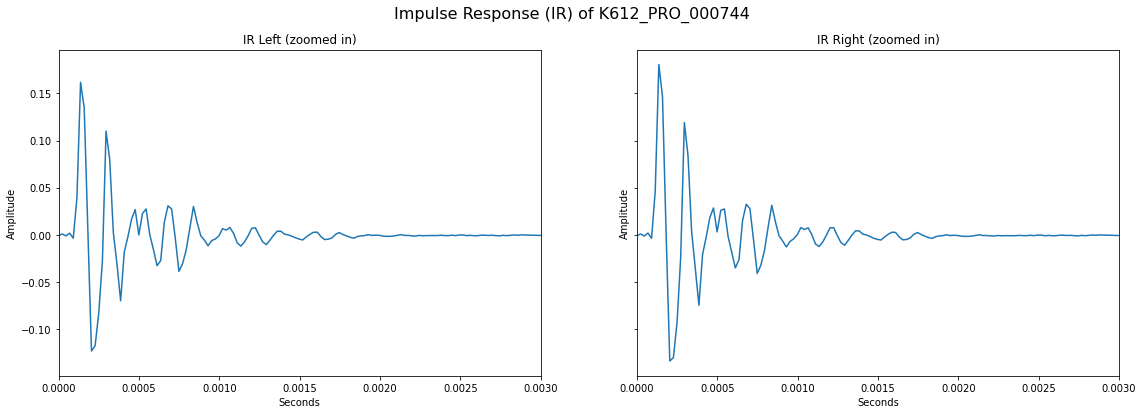

In [5]:
for headphone in headphones:
    get_average_of_impulse_response(headphone, count)